# **03. Convolutional Neural Networks and Computer Vision with TensorFlow**
So far we've covered the basics of TensorFlow and built a handful of models to work across different problems.

Now we're going to get specific and see how a special kind of neural network, convolutional neural networks (CNNs) can be used for computer vision (detecting patterns in visual data).

🔑 Note: In deep learning, many different kinds of model architectures can be used for different problems. For example, you could use a convolutional neural network for making predictions on image data and/or text data. However, in practice some architectures typically work better than others.

For example, you might want to:

Classify whether a picture of food contains pizza 🍕 or steak 🥩 (we're going to do this)
Detect whether or not an object appears in an image (e.g. did a specific car pass through a security camera?)

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-01-26 07:21:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.1MB/s    in 5.7s    

2023-01-26 07:21:26 (18.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jan 26 07:21 .
drwxr-xr-x 1 root root 4096 Jan 26 07:21 ..
drwxr-xr-x 4 root root 4096 Jan 26 07:21 test
drwxr-xr-x 4 root root 4096 Jan 26 07:21 train


In [ ]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names= np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names=class_names[0:]
print(class_names)

['pizza' 'steak']


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

train_dir="/content/pizza_steak/train"
test_dir="pizza_steak/test"
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42,shuffle="True")
valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

FileNotFoundError: ignored

In [ ]:
model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
 tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
 tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
 tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
  tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
 tf.keras.layers.MaxPool2D(pool_size=2),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(1,activation="sigmoid")

])

In [ ]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_1=model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 27s 307ms/step - loss: 0.6032 - accuracy: 0.6593 - val_loss: 0.4584 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 11s 227ms/step - loss: 0.4255 - accuracy: 0.8040 - val_loss: 0.3394 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 12s 261ms/step - loss: 0.3729 - accuracy: 0.8340 - val_loss: 0.3591 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 16s 338ms/step - loss: 0.3353 - accuracy: 0.8547 - val_loss: 0.3082 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 14s 303ms/step - loss: 0.3180 - accuracy: 0.8733 - val_loss: 0.3030 - val_accuracy: 0.8760


In [ ]:
model_3=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation="relu"),
     tf.keras.layers.Dense(100,activation="relu"),
      tf.keras.layers.Dense(100,activation="relu"),
      tf.keras.layers.Dense(1,activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 247ms/step - loss: 1.8445 - accuracy: 0.6493 - val_loss: 0.8359 - val_accuracy: 0.5980
Epoch 2/5
47/47 [==============================] - 10s 215ms/step - loss: 0.9036 - accuracy: 0.6620 - val_loss: 0.5577 - val_accuracy: 0.7420
Epoch 3/5
47/47 [==============================] - 10s 221ms/step - loss: 0.6041 - accuracy: 0.7400 - val_loss: 0.5398 - val_accuracy: 0.7160
Epoch 4/5
47/47 [==============================] - 12s 268ms/step - loss: 0.6483 - accuracy: 0.7027 - val_loss: 0.8040 - val_accuracy: 0.7580
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6510 - accuracy: 0.7480 - val_loss: 0.5122 - val_accuracy: 0.7660


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

--2023-01-26 07:23:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2023-01-26 07:23:59 (125 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



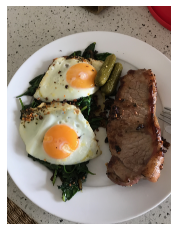

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
steak = load_and_prep_image("03-steak.jpeg")
steak


<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred=model_3.predict(tf.expand_dims(steak,axis=0))


1/1 [==============================] - 0s 86ms/step


In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
pred_class=class_names[int(tf.round(pred[0]))]
pred_class

'steak'

In [ ]:

def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  print(pred)
  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

--2023-01-26 07:24:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-01-26 07:24:01 (269 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 15ms/step
[[0.21938838]]


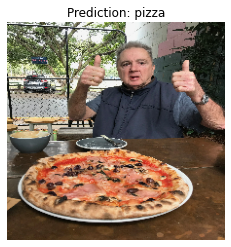

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_3, "03-pizza-dad.jpeg", class_names)

Multiclass

In [ ]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-01-26 07:26:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  24.1MB/s    in 22s     

2023-01-26 07:26:24 (22.3 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
import os
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are{len(dirnames)} directories and{len(filenames)} images in'{dirpath}'.")

There are2 directories and0 images in'10_food_classes_all_data'.
There are10 directories and0 images in'10_food_classes_all_data/train'.
There are0 directories and750 images in'10_food_classes_all_data/train/grilled_salmon'.
There are0 directories and750 images in'10_food_classes_all_data/train/pizza'.
There are0 directories and750 images in'10_food_classes_all_data/train/chicken_curry'.
There are0 directories and750 images in'10_food_classes_all_data/train/sushi'.
There are0 directories and750 images in'10_food_classes_all_data/train/steak'.
There are0 directories and750 images in'10_food_classes_all_data/train/fried_rice'.
There are0 directories and750 images in'10_food_classes_all_data/train/chicken_wings'.
There are0 directories and750 images in'10_food_classes_all_data/train/ice_cream'.
There are0 directories and750 images in'10_food_classes_all_data/train/ramen'.
There are0 directories and750 images in'10_food_classes_all_data/train/hamburger'.
There are10 directories and0 images

In [ ]:
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img


In [ ]:

import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-01-26 13:24:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  23.4MB/s    in 22s     

2023-01-26 13:25:18 (22.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:

import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

Image shape: (512, 384, 3)


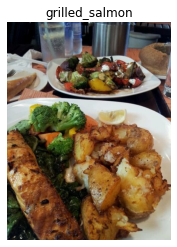

In [ ]:
import random
img=view_random_image(target_dir=train_dir,target_class=random.choice(class_names))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),batch_size=32,
                                             class_mode="categorical",shuffle="True")

test_data=test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),batch_size=32,
                                             class_mode="categorical",shuffle="True")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
model_8=Sequential([
    Conv2D(10,3,input_shape=(224,224,3),activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(len(class_names),activation="softmax")
])
model_8.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])



In [ ]:
history_8=model_8.fit(train_data,epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 61s 260ms/step - loss: 2.1963 - accuracy: 0.1877 - val_loss: 2.0544 - val_accuracy: 0.2436
Epoch 2/5
235/235 [==============================] - 58s 246ms/step - loss: 1.9309 - accuracy: 0.3308 - val_loss: 1.9196 - val_accuracy: 0.3428
Epoch 3/5
235/235 [==============================] - 44s 186ms/step - loss: 1.6227 - accuracy: 0.4412 - val_loss: 1.9012 - val_accuracy: 0.3428
Epoch 4/5
235/235 [==============================] - 44s 188ms/step - loss: 1.1690 - accuracy: 0.6147 - val_loss: 2.2006 - val_accuracy: 0.3104
Epoch 5/5
235/235 [==============================] - 45s 191ms/step - loss: 0.6267 - accuracy: 0.7971 - val_loss: 3.1337 - val_accuracy: 0.2896


In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

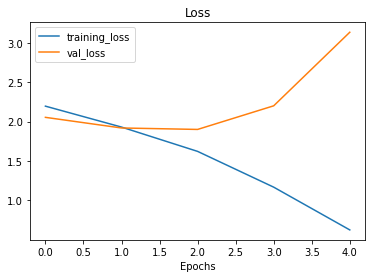

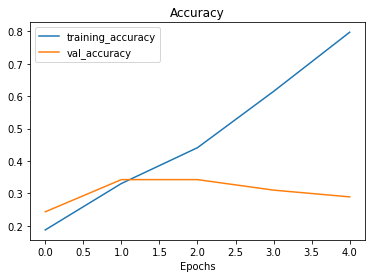

In [ ]:
plot_loss_curves(history_8)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
model_9=Sequential([
    Conv2D(10,3,input_shape=(224,224,3),activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,input_shape=(224,224,3),activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(len(class_names),activation="softmax")
])
model_9.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])



In [ ]:
history_9=model_9.fit(train_data,epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 44s 186ms/step - loss: 2.0906 - accuracy: 0.2511 - val_loss: 1.9134 - val_accuracy: 0.3252
Epoch 2/5
235/235 [==============================] - 43s 183ms/step - loss: 1.7319 - accuracy: 0.4185 - val_loss: 1.8415 - val_accuracy: 0.3540
Epoch 3/5
235/235 [==============================] - 41s 176ms/step - loss: 1.3665 - accuracy: 0.5580 - val_loss: 1.9100 - val_accuracy: 0.3600
Epoch 4/5
235/235 [==============================] - 43s 183ms/step - loss: 0.9267 - accuracy: 0.7151 - val_loss: 2.1528 - val_accuracy: 0.3416
Epoch 5/5
235/235 [==============================] - 41s 175ms/step - loss: 0.5305 - accuracy: 0.8527 - val_loss: 2.5111 - val_accuracy: 0.3136


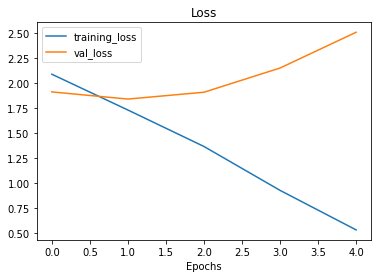

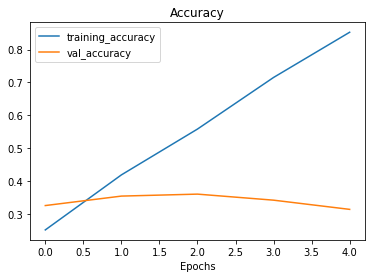

In [ ]:
plot_loss_curves(history_9)

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
model_10=tf.keras.models.clone_model(model_8)
model_10.compile(loss="categorical_crossentropy",
                               optimizer=tf.keras.optimizers.Adam(lr=0.001),
                               metrics=["accuracy"])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history_10=model_10.fit(train_data_augmented,epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 121s 483ms/step - loss: 2.2332 - accuracy: 0.1567 - val_loss: 2.1157 - val_accuracy: 0.2432
Epoch 2/5
235/235 [==============================] - 109s 464ms/step - loss: 2.1079 - accuracy: 0.2515 - val_loss: 1.9349 - val_accuracy: 0.3220
Epoch 3/5
235/235 [==============================] - 109s 465ms/step - loss: 1.9923 - accuracy: 0.2952 - val_loss: 1.8205 - val_accuracy: 0.3780
Epoch 4/5
235/235 [==============================] - 111s 471ms/step - loss: 1.9391 - accuracy: 0.3305 - val_loss: 1.8159 - val_accuracy: 0.3788
Epoch 5/5
235/235 [==============================] - 109s 464ms/step - loss: 1.9093 - accuracy: 0.3417 - val_loss: 1.7698 - val_accuracy: 0.3920


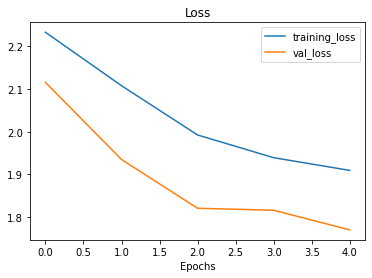

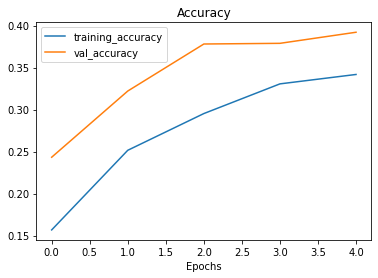

In [ ]:
plot_loss_curves(history_10)

In [ ]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg


In [ ]:
def pred_and_plot_multi(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 188ms/step


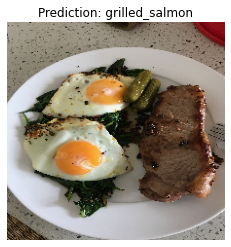

In [ ]:
pred_and_plot_multi(model=model_10,
              filename="03-steak.jpeg",
              class_names=class_names)


1/1 [==============================] - 0s 15ms/step


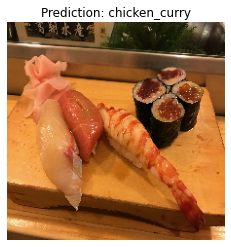

In [ ]:
pred_and_plot_multi(model_10, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 17ms/step


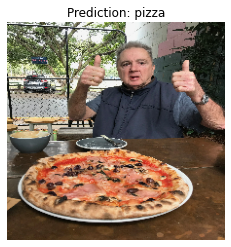

In [ ]:
pred_and_plot_multi(model_10, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 16ms/step


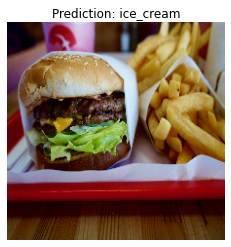

In [ ]:
pred_and_plot_multi(model_10, "03-hamburger.jpeg", class_names)

In [ ]:
y_pred=model_10.predict(test_data)

79/79 [==============================] - 10s 132ms/step


In [ ]:
y_pred.shape

(2500, 10)

In [ ]:
from sklearn.metrics import confusion_matrix
ypred=[max(i) for i in y_pred]


In [ ]:
y_pred[0]

array([0.0700995 , 0.03253898, 0.16289073, 0.22396158, 0.07238518,
       0.10627449, 0.01131781, 0.21595839, 0.06939244, 0.03518086],
      dtype=float32)

Found 2500 images belonging to 10 classes.


In [ ]:
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

In [ ]:
model_10.save("saved_trained_model_10")